# Аналитика в авиакомпании

Целью настоящего исследования является анализ спроса на рынке внутренних пассажирских авиаперевозок на основе данных о рейсах российской авиакомпании. Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. По используемым техническим средствам проект делится на три части: парсинг данных, изучение базы данных с помощью SQL-запросов и аналитика с помощью Python.

Задачи исследования:
1. Написать парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года;
2. Изучить базу данных и выгрузить данные о количестве рейсов во время фестивалей;
3. Проанализировать полученные данные:
    1. Выбрать топ-10 городов по количеству рейсов;
    2. Изучить зависимости между количеством рейсов и следующими параметрами:
        1. модели самолетов,
        2. города прибытия.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Парсинг-данных-о-11-крупнейших-фестивалях-2018-года" data-toc-modified-id="Парсинг-данных-о-11-крупнейших-фестивалях-2018-года-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Парсинг данных о 11 крупнейших фестивалях 2018 года</a></span></li><li><span><a href="#Изучение-базы-данных-авиакомпании" data-toc-modified-id="Изучение-базы-данных-авиакомпании-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение базы данных авиакомпании</a></span></li><li><span><a href="#Аналитика-средствами-Python" data-toc-modified-id="Аналитика-средствами-Python-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аналитика средствами Python</a></span><ul class="toc-item"><li><span><a href="#Изучение-и-предобработка-данных" data-toc-modified-id="Изучение-и-предобработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-первой-таблицы" data-toc-modified-id="Изучение-первой-таблицы-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Изучение первой таблицы</a></span></li><li><span><a href="#Изучение-второй-таблицы" data-toc-modified-id="Изучение-второй-таблицы-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Изучение второй таблицы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Определение-топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Определение-топ-10-городов-по-количеству-рейсов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Визуальный-анализ-зависимостей" data-toc-modified-id="Визуальный-анализ-зависимостей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Визуальный анализ зависимостей</a></span><ul class="toc-item"><li><span><a href="#Количество-рейсов-по-моделям-самолётов" data-toc-modified-id="Количество-рейсов-по-моделям-самолётов-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Количество рейсов по моделям самолётов</a></span></li><li><span><a href="#Количество-рейсов-по-всем-городам" data-toc-modified-id="Количество-рейсов-по-всем-городам-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Количество рейсов по всем городам</a></span></li><li><span><a href="#Количество-рейсов-по-городам-(топ-10)" data-toc-modified-id="Количество-рейсов-по-городам-(топ-10)-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Количество рейсов по городам (топ-10)</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Парсинг данных о 11 крупнейших фестивалях 2018 года

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [2]:
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'

In [3]:
req = requests.get(URL)

In [4]:
data = BeautifulSoup(req.text, 'lxml')

In [5]:
heading = []

for row in data.find_all('th'):
    heading.append(row.text)

In [6]:
content = []

for row in data.find_all('tr'):
      if not row.find_all('th'): 
             content.append([element.text for element in row.find_all('td')])

In [7]:
festivals = pd.DataFrame(content, columns=heading)
display(festivals)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## Изучение базы данных авиакомпании

In [8]:
#SQL-запрос №1: Вывести список городов, в которых есть аэропорты
query = '''
SELECT
    DISTINCT city
FROM
    airports
'''

In [9]:
#SQL-запрос №2: Посчитать количество вылетов из каждого аэропорта
query = '''
SELECT
    departure_airport,
    COUNT(flight_id) AS cnt_flights
FROM
    flights
GROUP BY
    departure_airport
ORDER BY
    cnt_flights DESC
'''

In [10]:
#SQL-запрос №3: Посчитать количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года
query = '''
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    aircrafts
    INNER JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    flights.departure_time::date BETWEEN '01.09.2018' AND '30.09.2018'
GROUP BY
    aircrafts.model
'''

In [11]:
#SQL-запрос №4: Посчитать количество рейсов по всем моделям самолётов Boeing, Airbus и остальным в сентябре 2018 года
query = '''
SELECT
       CASE 
            WHEN aircrafts.model like 'Boeing%' 
            THEN 'Boeing'
            WHEN aircrafts.model like 'Airbus%' 
            THEN 'Airbus'
            ELSE 'other' 
        END AS type_aircraft,
        COUNT(flights.flight_id) AS flights_amount
FROM aircrafts
JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
WHERE flights.departure_time::date BETWEEN '01.09.2018' AND '30.09.2018'
GROUP BY
        CASE 
            WHEN model like 'Boeing%' 
            THEN 'Boeing'
            WHEN model like 'Airbus%' 
            THEN 'Airbus'
            ELSE 'other' 
        END
'''

In [12]:
#SQL-запрос №5: Посчитать среднее количество прибывающих рейсов в день для каждого города за август 2018 года
query = '''
SELECT subq.city AS city
    , AVG(cnt) AS average_flights
FROM
(SELECT
    COUNT(f.flight_id) AS cnt
    , EXTRACT(DAY FROM f.arrival_time::date) AS arrival_day
    , a.city AS city
 FROM flights AS f
 JOIN airports AS a ON f.arrival_airport = a.airport_code
 WHERE f.arrival_time::date BETWEEN '01.08.2018' AND '31.08.2018'
 GROUP BY arrival_day,
     city) AS subq
GROUP BY city
'''

In [13]:
#SQL-запрос №6: Выведите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве
query = '''
SELECT festival_name AS festival_name
    , EXTRACT(week FROM festival_date::date) AS festival_week
FROM festivals
WHERE festival_city = 'Москва' 
AND festival_date::date BETWEEN '23.07.2018' AND '30.09.2018'
'''

In [14]:
#SQL-запрос №7: Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву 
#Добавьте информацию о проходивших фестивалях из предыдущего запроса
query = '''
SELECT
    EXTRACT(WEEK FROM f.arrival_time::date) AS week_number
    , COUNT(tf.ticket_no) AS ticket_amount
    , subq.festival_week AS festival_week
    , subq.festival_name AS festival_name
FROM flights AS f
INNER JOIN ticket_flights AS tf ON tf.flight_id = f.flight_id
INNER JOIN airports AS a on a.airport_code = f.arrival_airport
LEFT JOIN
(SELECT
    festival_name as festival_name
    , EXTRACT(WEEK FROM festival_date::date) AS festival_week
 FROM festivals
 WHERE festival_city = 'Москва' 
 AND festival_date::date BETWEEN '23.07.2018' AND '30.09.2018') AS subq
ON EXTRACT(WEEK FROM f.arrival_time::date) = subq.festival_week
WHERE a.city = 'Москва' 
AND f.arrival_time::date BETWEEN '23.07.2018' AND '30.09.2018'
GROUP BY week_number, festival_week, festival_name
'''

## Аналитика средствами Python

Информации о влиянии музыкальных фестивалей недостаточно, чтобы провести качественную статистическую проверку гипотез, поэтому будем презюмировать, что проведение фестивалей не оказывает серьёзного влияния на спрос: из полученных данных следует, что количество проданных за неделю билетов всегда примерно одинаковое. Поэтому ограничимся изучением влияния других факторов.

Задачи данного подраздела:
1. Выбрать топ-10 городов по количеству рейсов; 
2. Изучить зависимости между количеством рейсов и следующими параметрами: 
    - i) модели самолетов, 
    - ii) города,
    -iii) топ-10 городов.

Результаты будут использованы для планирования расписания рейсов и маркетинговых целей.

### Изучение и предобработка данных

In [15]:
#импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#чтение файлов
models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

#### Изучение первой таблицы

In [17]:
models.info() #выведем краткую сводку по таблице с моделями самолетов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Поскольку первая таблица довольно короткая (8 строк), выведем её целиком.

In [18]:
display(models)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице models содержатся данные о модели самолета и количестве рейсов для каждой модели, совершённых в сентябре 2018 года. Пропущенных значений в ней нет, типы данных - строковый для названия модели и int64 для количества рейсов - соответствуют имеющимся данным.

#### Изучение второй таблицы

In [19]:
cities.info() #выведем краткую сводку по таблице с городами прилёта

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [20]:
cities.sample(5) #посмотрим на пять случайных строк

,city,average_flights
87,Усть-Илимск,2.870968
55,Новый Уренгой,8.290323
23,Иркутск,6.032258
20,Екатеринбург,11.322581
57,Ноябрьск,3.000000


В таблице cities содержатся данные о городах и среднем количестве рейсов, прибывающих в город за один день в августе 2018 года. Пропущенных значений во второй таблице также нет, типы данных - строковый для названий городов и float64 для среднего числа рейсов - соответствуют имеющимся данным. Проверим данные на наличие дубликатов и аномальных значений.

In [21]:
cities.duplicated().sum() #проверка на дубли

0

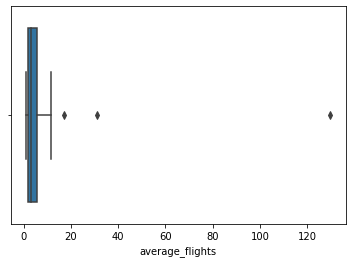

In [22]:
sns.boxplot(x='average_flights', data = cities)

Диаграмма размаха показывает, что в большинство городов из нашего датафрейма в день прилетает в среднем не больше пятнадцати рейсов, однако имеются единичные выбросы в районе 18, 30 и 130 рейсов в день. Проверим, какие это города.

In [23]:
cities.query('average_flights > 15').sort_values(by='average_flights', ascending=False)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581


Самые высокие значения среднего количества рейсов зафиксированы в крупных транспортных хабах (Москва, Санкт-Петербург, Новосибирск), что логично, поэтому нет оснований считать эти данные ошибочными. Таким образом, данные во второй таблице тоже готовы для анализа.

#### Вывод

Мы изучили два набора данных: таблицу с моделями самолетов и количеством рейсов для каждой модели, совершённых в сентябре 2018 года, и таблицу с городами и средним количеством рейсов, прибывающих в город за один день в августе 2018 года. По результатам первичного анализа необходимости в предобработке данных не выявлено, можно переходить к глубокому изучению.

### Определение топ-10 городов по количеству рейсов

In [24]:
top10 = cities.sort_values(by='average_flights', ascending=False).head(10)['city'].tolist()
display(top10)

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Красноярск',
 'Екатеринбург',
 'Ростов-на-Дону',
 'Пермь',
 'Брянск',
 'Сочи',
 'Ульяновск']

Больше всего рейсов прибывает в следующие города: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск.

### Визуальный анализ зависимостей

#### Количество рейсов по моделям самолётов

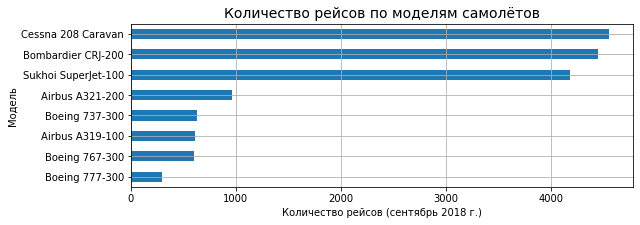

In [25]:
models.sort_values(by='flights_amount').plot(kind='barh', x='model', grid=True, legend=False, figsize=(9,3))
plt.title('Количество рейсов по моделям самолётов', fontsize=14)
plt.xlabel('Количество рейсов (сентябрь 2018 г.)')
plt.ylabel('Модель')
plt.show()

График показывает, что самые используемые модели самолётов - это Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. В сентябре 2018 года на каждой из них было совершено более 4000 внутренних рейсов, что намного больше, чем на двух моделях Airbus и трёх моделях Boeing. Вероятно, более просторные Airbus и Boeing активнее задействованы в международных перевозках, тогда как на внутренних рейсах используются самолёты поменьше, предназначенные для полётов на малые расстояния.

#### Количество рейсов по всем городам

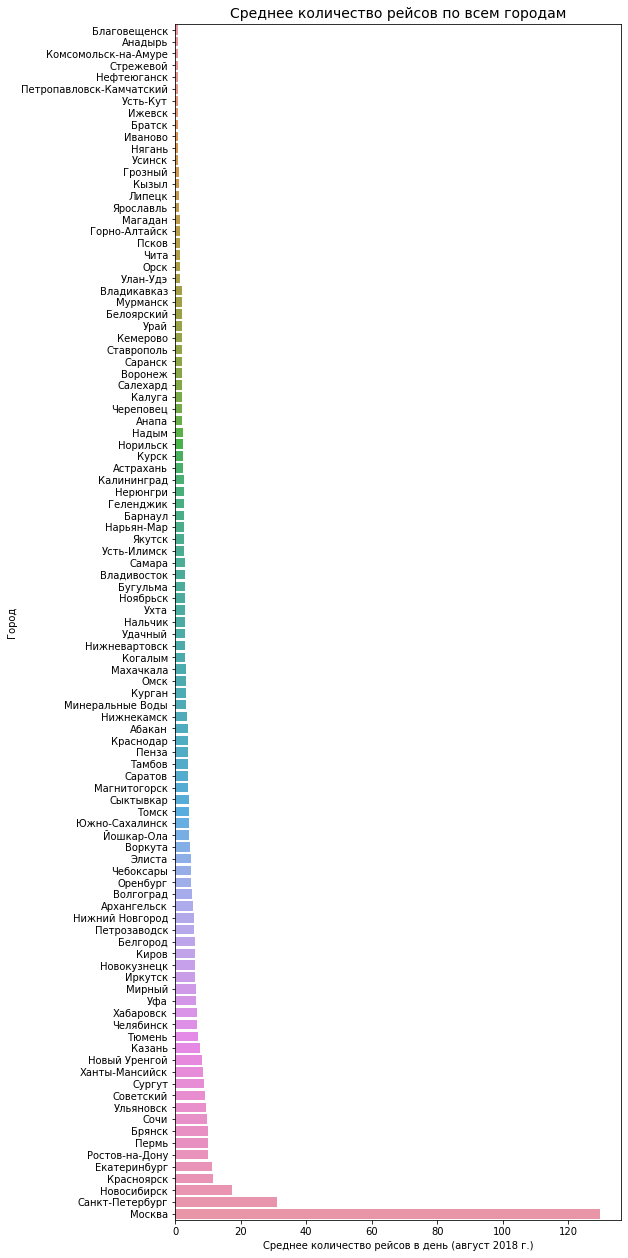

In [26]:
fig, ax = plt.subplots(figsize=(8, 22))
sns.barplot(y='city', x='average_flights', data=cities.sort_values(by='average_flights'))
plt.title('Среднее количество рейсов по всем городам', fontsize=14)
plt.xlabel('Среднее количество рейсов в день (август 2018 г.)')
plt.ylabel('Город')
plt.show()

Мы видим, что явным лидером по количеству прибывающих за день самолётов является Москва: в Санкт-Петербург, находящийся на втором месте в рейтинге, прибывает в четыре раза меньше рейсов за день. В большинство городов прибывает в среднем по 5-10 рейсов, также есть двенадцать городов (Благовещенск, Анадырь, Комсомольск-на-Амуре, Стрежевой, Нефтеюганск, Петропавловск-Камчатский, Усть-Кут, Ижевск, Братск, Иваново, Нягань, Усинск), в которые в среднем прилетает всего один самолёт в день.

#### Количество рейсов по городам (топ-10)

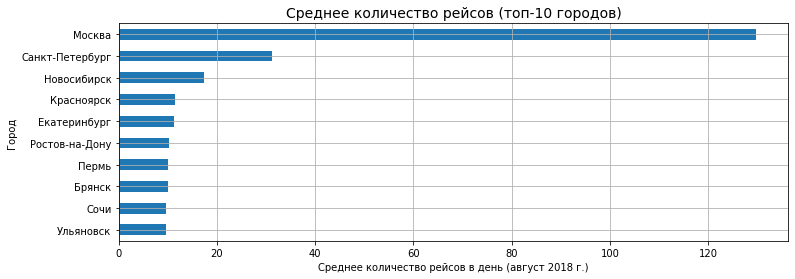

In [27]:
cities.query('city in @top10').sort_values(by='average_flights').plot(kind='barh', x='city', grid=True, legend=False, figsize=(12,4))
plt.title('Среднее количество рейсов (топ-10 городов)', fontsize=14)
plt.xlabel('Среднее количество рейсов в день (август 2018 г.)')
plt.ylabel('Город')
plt.show()

Как было отмечено ранее, по количеству рейсов в день выделяется Москва (129.77), затем идёт Санкт-Петербург (31.16) и Новосибирск (17.32). Среднее число прибывающих рейсов в остальных городах первой десятки различается незначительно - 9-11 самолётов за день.

### Общий вывод

По результатам изучения базы данных авиакомпании за август-сентябрь 2018 года можно сделать следующие выводы:
1. Больше всего рейсов прибывает в Москву, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск.
2. Самые используемые модели самолётов - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, небольшие и удобные для внутренних рейсов.
3. Среднее число прибывающих рейсов в день наибольшее в Москве (129.77), затем идут Санкт-Петербург (31.16 - в четыре раза меньше, чем в Москве) и Новосибирск (17.32). В остальные города первой десятки совершается по 9-11 рейсов за день, есть двенадцать городов (Благовещенск, Анадырь, Комсомольск-на-Амуре, Стрежевой, Нефтеюганск, Петропавловск-Камчатский, Усть-Кут, Ижевск, Братск, Иваново, Нягань, Усинск), которые в день принимают всего по одному рейсу.